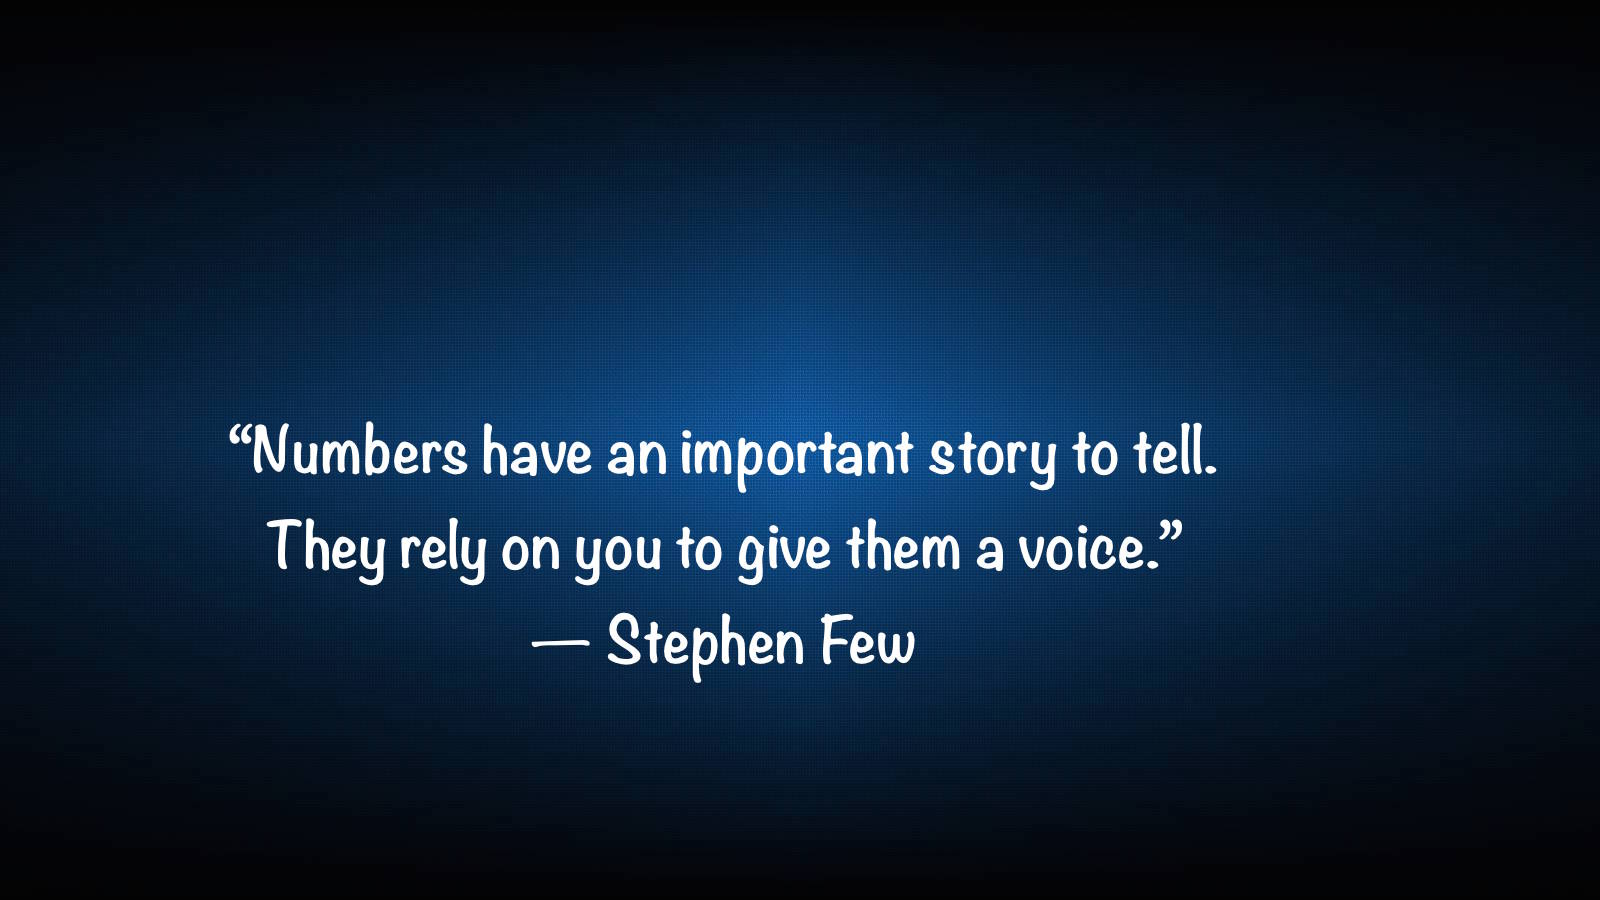

This [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html) page provides the excellent reference.

After doing the usual feature engineering, selection, implementing a model and getting some output in the form of a probability or a class, the next step is to find out how effective is the model based on some metric using test datasets. The metric explains the performance of a model.

The model may give satisfying results when evaluated using a metric say accuracy_score but may give poor results when evaluated against other metrics such as logarithmic_loss or any other such metric. Hence, it is very much important to choose the right metric to evaluate the Machine Learning model.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how we weight the importance of different characteristics in the results.

## <u> Classification Metrics</u>

- Accuracy.
- Logarithmic Loss.
- ROC, AUC.
- Confusion Matrix.
- Classification Report.

## <u> Regression Metrics</u>

- Mean Absolute Error.
- Mean Squared Error.
- Root Mean Squared Error.
- Root Mean Squared Logarithmic Error.
- R Square.
- Adjusted R Square.

In <b> classification problems </b>, we use two types of algorithms (dependent on the kind of output it creates):

- <b> Class output </b>: Algorithms like SVM and KNN create a class output. For instance, in a binary classification problem, the outputs will be either 0 or 1. SKLearn's/Other algorithms can convert these class outputs to probability.

- <b> Probability output </b>: Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Probability outputs can be converted to class output by creating a threshold probability.

In regression problems the output is always continuous in nature and requires no further treatment.

## <u> Classification Metrices </u>

- Dataset: Pima Indians onset of diabetes dataset.
- Evaluation Algorithm: Logistic Regression, SGDClassifier, RandomForestClassifier.

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


diabetes_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

X =  diabetes_data.drop(["Outcome"],axis = 1)
y = diabetes_data["Outcome"]

# Train multiple models with various hyperparameters using the training set, select the model and hyperparameters that perform best on the validation set.
# Once model type and hyperparameters have been selected, train final model using these hyperparameters on the full training set, the generalized error is finally measured on the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 56)

# StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
cv = StratifiedKFold(n_splits=10, shuffle = False, random_state = 76)

# Logistic Regression
clf_logreg = LogisticRegression()
# fit model
clf_logreg.fit(X_train, y_train)
# Make class predictions for the validation set.
y_pred_class_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv)
# predicted probabilities for class 1, probabilities of positive class
y_pred_prob_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv, method="predict_proba")
y_pred_prob_logreg_class1 = y_pred_prob_logreg[:, 1]

# SGD Classifier
clf_SGD = SGDClassifier()
# fit model
clf_SGD.fit(X_train, y_train)
# make class predictions for the validation set
y_pred_class_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv)
# predicted probabilities for class 1
y_pred_prob_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv, method="decision_function")

# Random Forest Classifier
clf_rfc = RandomForestClassifier()
# fit model
clf_rfc.fit(X_train, y_train)
# make class predictions for the validation set
y_pred_class_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv)
# predicted probabilities for class 1
y_pred_prob_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv, method="predict_proba")
y_pred_prob_rfc_class1 = y_pred_prob_rfc[:, 1]

* <b>Quick Note </b>: SkLearn's "predict_log_proba" gives the logarithm of the probabilities, this is often handier as probabilities can become very, very small.

### <u>Null accuracy</u>:
- Accuracy that could be achieved by always predicting the most frequent class.
- This means that a dumb model that always predicts 0/1 would be right "null_accuracy" % of the time.

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np

class BaseClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
base_clf = BaseClassifier()
cross_val_score(base_clf, X_train, y_train, cv=10, scoring="accuracy").mean()


# Method 2
# calculate null accuracy (for binary / multi-class classification problems)
# null_accuracy = y_train.value_counts().head(1) / len(y_train)

### <u> Classification Accuracy </u>

- Classification Accuracy or Accuracy is the ratio of number of correct predictions to the total number of input samples.

$$Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions\ made} = \frac{TP + TN}{TP + TN + FP + FN}$$

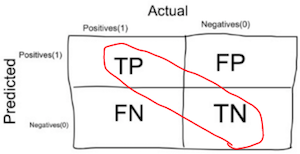

#### <u> When to use accuracy metric: </u>

- When there are roughly equal number of samples belonging to each class.

#### <u> When not to use accuracy metric: </u>

- When only one class holds majority of samples.


<b>Example</b>: Consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.

When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy may give us the false sense of achieving high accuracy.

In [ ]:
# calculate accuracy

acc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring = 'accuracy').mean()
acc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'accuracy').mean()

acc_logreg, acc_SGD, acc_rfc

### <u> Logarithmic Loss / Log Loss / Logistic Loss / Cross-Entropy Loss </u>

- When working with Log Loss, the classifier must assign probability to each class for all the samples.
- Log loss measures the UNCERTAINTY of the probabilities of the model by comparing them to the true labels and penalising the false classifications.
- Log loss is only defined for two or more labels.
- Log Loss gradually declines as the predicted probability improves, thus Log Loss nearer to 0 indicates higher accuracy, Log Loss away from 0 indicates lower accuracy.
- Log Loss exists in the range (0, ∞]. 

Suppose, there are N samples belonging to M classes, then the Log Loss is calculated as below :

$$ Log\ Loss = \frac{-1}{N} \sum_{i=1}^{N} \sum_{i=1}^{M}  y_{ij} * \log(\hat{y_{ij}})$$

where,

- $y_{ij}$, indicates whether sample i belongs to class j or not

- $p_{ij}$, indicates the probability of sample i belonging to class j


The negative sign negates $\log(\hat{y_{ij}})$ output which is always negative. $\hat{y_{ij}}$ outputs a probability (0 - 1), $\log(x)$ is nagative if 0 < x < 1.

<b>Example </b>: Let the training labels are 0 and 1 but our training predictions are 0.4, 0.6, 0.89 etc. To calculate a measure of the error of our model, we may classify all the observations having values > 0.5 into 1 .But doing so, we are at a high risk of increasing the misclassification. This is because it may so happen that many values having probabilities 0.4, 0.45, 0.49 can have a true value of 1.

This is where logLoss comes into picture.

Now let us closely follow the formula of LogLoss. There can be 4 major cases for the values of $y_{ij}$ and $p_{ij}$

- Case 1 : $y_{ij}$=1 , $p_{ij}$ = High

- Case 2 : $y_{ij}$=1 , $p_{ij}$ = Low

- Case 3 : $y_{ij}$=0 , $p_{ij}$ = Low

- Case 4 : $y_{ij}$=0 , $p_{ij}$ = High

<u>How does LogLoss measures uncertainity ?</u>

If we have more of Case 1's and Case 3's, then the sum(and mean) inside the logloss formula would be greater and will be substantially larger in comparison to what it would have been if Case 2's and Case 4's got added. Now this value is as large as possible as Case 1's and Case 3's which indicates a good prediction. If we multiply it by (- 1) , we would make the value as small as possible. This would now intuitively mean - Smaller the value, better is the model i.e. smaller the logloss, better is the model i.e. smaller the UNCERTAINTY, better is the model.

In [ ]:
# calculate logloss

logloss_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
logloss_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()

# SGDClassifier's hinge loss doesn't support probability estimates.
# We can set SGDClassifier as the base estimator in Scikit-learn's CalibratedClassifierCV, which will generate probability estimates.

from sklearn.calibration import CalibratedClassifierCV

new_clf_SGD = CalibratedClassifierCV(clf_SGD)
new_clf_SGD.fit(X_train, y_train)
logloss_SGD = cross_val_score(new_clf_SGD, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()

logloss_logreg, logloss_SGD, logloss_rfc

### <u> ROC Curve </u>

ROC can be broken down into sensitivity and specificity. Choosing the best model is sort of a balance between predicting 1's accurately or 0's accurately. In other words sensitivity and specificity.

- True Positive Rate (Sensitivity/ Recall) : True Positive Rate is defined as TP/ (FN+TP). True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.

- False Positive Rate (Specificity) : False Positive Rate is defined as FP / (FP+TN). False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.

True Positive Rate and False Positive Rate both have values in the range [0, 1]. TPR and FPR both are computed at threshold values such as (0.00, 0.02, 0.04, …., 1.00) and a graph is drawn.

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects false positive rate(fpr), true positive rate(tpr), thresholds

fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_train, y_pred_prob_logreg_class1)
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_train, y_pred_prob_rfc_class1)
fpr_SGD, tpr_SGD, thresholds_SGD = metrics.roc_curve(y_train, y_pred_prob_SGD)

plt.plot(fpr_logreg, tpr_logreg, label="logreg")
plt.plot(fpr_rfc, tpr_rfc, label="rfc")
plt.plot(fpr_SGD, tpr_SGD, label="SGD")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

#### <u>Interpreting ROC Plot</u>:

Interpreting the ROC plot is very different from a regular line plot. Because, though there is an X and a Y-axis, we don't read it as: for an X value of 0.25, the Y value is .9.

Instead, what we have here is a line that traces the probability cutoff from 1 at the bottom-left to 0 in the top right.

This is a way of analyzing how the sensitivity and specificity perform for the full range of probability cutoffs, that is from 0 to 1.

Ideally, if we have a perfect model, all the events will have a probability score of 1 and all non-events will have a score of 0. For such a model, the area under the ROC will be a perfect 1.

So, if we trace the curve from bottom left, the value of probability cutoff decreases from 1 towards 0. If we have a good model, more of the real events should be predicted as events, resulting in high sensitivity and low FPR. In that case, the curve will rise steeply covering a large area before reaching the top-right.

Therefore, the larger the area under the ROC curve, the better is the model.

The ROC curve is the only metric that measures how well the model does for different values of prediction probability cutoffs.



In [ ]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    print('Sensitivity:', tpr[clf_threshold > threshold][-1])
    print('Specificity:', 1 - fpr[clf_threshold > threshold][-1])

In [ ]:
# Logistic Regression
evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.2), evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.8)

In [ ]:
# Random Forest Classifier
evaluate_threshold(tpr_rfc, fpr_rfc, thresholds_rfc, 0.2), evaluate_threshold(tpr_rfc, fpr_rfc, thresholds_rfc, 0.8)

In [ ]:
# SGD
evaluate_threshold(tpr_SGD, fpr_SGD, thresholds_SGD, 0.2), evaluate_threshold(tpr_SGD, fpr_SGD, thresholds_SGD, 0.8)

### <u> AUC </u>
- The probabilistic interpretation of ROC-AUC score is that if we randomly choose a positive case and a negative case, the probability that the positive case outranks the negative case according to the classifier is given by the AUC. Here, rank is determined according to order by predicted values.
- ROC-AUC score is independent of the threshold set for classification because it only considers the rank of each prediction and not its absolute value. The same is not true for F1 score which needs a threshold value in case of probabilities output
- AUC is the percentage of the ROC plot that is underneath the curve.
- The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.
- AUC is useful even when there is high class imbalance (unlike classification accuracy)
- Fraud case
     - Null accuracy almost 99%
     - AUC is useful here

General AUC predictions:
- .90-1 = Excellent
- .80-.90 = Good
- .70-.80 = Fair
- .60-.70 = Poor
- .50-.60 = Fail

AUC ROC considers the predicted probabilities for determining the model’s performance. But, it only takes into account the order of probabilities and hence it does not take into account the model’s capability to predict higher probability for samples more likely to be positive(Log Loss).

Whereas the AUC is computed with regards to binary classification with a varying decision threshold, log loss actually takes “certainty” of classification into account.

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
# print(metrics.roc_auc_score(y_test, y_pred_prob))

In [ ]:
roc_auc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()

roc_auc_logreg, roc_auc_SGD, roc_auc_rfc

### <u>Confusion Matrix </u>

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. Confusion Matrix gives us a matrix as output and describes the complete performance of the model.

The correct predictions falls on the diagonal line of the matrix.

4 important terms in Confusion Matrix:
- True Positives : The cases in which we predicted YES and the actual output was also YES.
- True Negatives : The cases in which we predicted NO and the actual output was NO.
- False Positives : The cases in which we predicted YES and the actual output was NO.
- False Negatives : The cases in which we predicted NO and the actual output was YES.

The Confusion matrix in itself is not a performance measure as such, but almost all of the performance metrics are based on Confusion Matrix and the numbers inside it.

In [ ]:
logreg_matrix = metrics.confusion_matrix(y_train, y_pred_class_logreg)
print(logreg_matrix)

In [ ]:
SGD_matrix = metrics.confusion_matrix(y_train, y_pred_class_SGD)
print(SGD_matrix)

In [ ]:
rfc_matrix = metrics.confusion_matrix(y_train, y_pred_class_rfc)
print(rfc_matrix)

### <u>Classification Report </u>

The classification_report() function displays the precision, recall, f1-score and support for each class.

#### <u> Precision </u>
It is the number of True Positive divided by the number of positive results predicted by the classifier.

$$ Precision =  \frac{True\ Positives}{True\ Positives + False\ Positives} $$

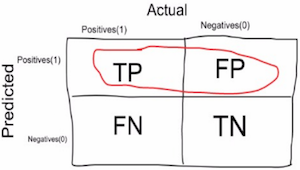

#### <u> Recall/ Sensitivity </u>

It is the number of True Positives divided by the number of all relevant samples (all samples that should have been identified as positive).

$$Recall =  \frac{True\ Positives}{True\ Positives + False\ Negatives}$$

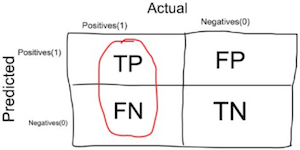

- To minimising False Negatives, we would want our Recall to be as close to 100% 
- To minimising False Positives, we would want our Precision to be as close to 100% 

#### <u> Specificity / TNR (True Negative Rate)</u>

- Proportion of actual negative cases which are correctly identified.
- Specificity is the exact opposite of Recall.

$$Specificity =  \frac{True\ Negatives}{True\ Negatives + False\ Positives}$$

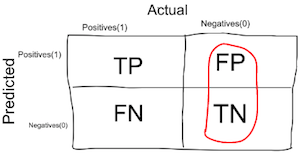

#### <u> F1 Score </u>
- F1 Score is the Harmonic Mean between precision and recall.

- It tells how precise the classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
- The greater the F1 Score, the better is the performance of our model.
- Range [0, 1].

$$F1 = 2 * \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$$

#### Why Harmonic Mean ?

Ex: We have a binary classification model with the following results:

Precision: 0, Recall: 1

If we take the arithmetic mean, we get 0.5. It is clear that the above result comes from a dumb classifier which just ignores the input and just predicts one of the classes as output. Now, if we were to take HM, we will get 0 which is accurate as this model is useless for all purposes.

Harmonic mean is an average when x and y are equal. But when x and y are different, then it’s closer to the smaller number as compared to the larger number. If one number is really small between precision and recall, the F1 Score of raises a flag and is more closer to the smaller number than the bigger one, giving the model an appropriate score rather than just an arithmetic mean.

In [ ]:
report_logreg = metrics.classification_report(y_train, y_pred_class_logreg)   
report_SGD = metrics.classification_report(y_train, y_pred_class_SGD)
report_rfc = metrics.classification_report(y_train, y_pred_class_rfc)
print("report_logreg " +  "\n" + report_logreg,"report_SGD "  +  "\n" +  report_SGD,"report_rfc "  +  "\n" +  report_rfc, sep = "\n")

### <u>Precision - Recall Tradeoff</u>

In some contexts we mostly care about precision, and in other contexts we care about recall. For example, if we trained a classifier to detect videos that are safe for kids, ew would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision). On the other hand, suppose we train a classifier to detect shoplifters on surveillance images: it is probably fine if our classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Increasing Precision reduces Recall, and vice versa. This is called the <i> Precision - Recall Tradeoff </i>.

To understand this tradeoff, let’s look at how the SGDClassifier / LogisticRegression / RandomForestClassifier makes their classification decisions. For each instance, they computes a score based on a decision function / predict_proba, and if that score is greater than a threshold, they assigns the instance to the positive class, or else it assigns it to the negative class.

Figure below shows a few digits positioned from the lowest score on the left to the highest score on the right, the task is to predict number "5" from the images. Suppose the decision threshold is positioned at the central arrow: we will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (6). With that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if we raise the threshold (move it to the arrow on the right), the false positive (6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering the threshold increases recall and reduces precision.

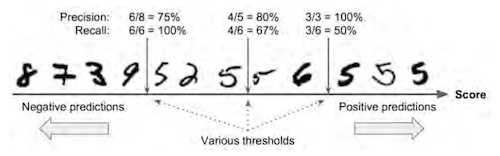



Scikit-Learn does not let us set the threshold directly, but it does give us access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, we can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold we want:

In [ ]:
y_decision_function_scores = clf_logreg.decision_function(X_train)
y_decision_function_scores[6]

In [ ]:
threshold = 0
y_decision_function_pred = (y_decision_function_scores[6] > threshold)
y_decision_function_pred

Classifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method (i.e., True). Let’s raise the threshold

In [ ]:
threshold = 2
y_decision_function_pred = (y_decision_function_scores[6] > threshold)
y_decision_function_pred

This confirms that raising the threshold decreases recall. The instance actually represents a 1(True), and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 2.

To decide which threshold to use, we first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that you want it to return decision scores/probability instead of class:

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob_logreg_class1)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Now we can simply select the threshold value that gives us the best precision/recall tradeoff for our task. let’s suppose you decide to aim for 80% recall. You look up the first plot (zooming in a bit) and find that you need to use a threshold of about 0.32. To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred_90 = (y_pred_prob_logreg_class1 > 0.32)

precisionScore = precision_score(y_train, y_pred_90)
recallScore = recall_score(y_train, y_pred_90)
precisionScore, recallScore

### <u>Conclusion</u>:

#### Comparison of Log-loss with ROC & F1

#### <u>Case 1 : Balanced Dataset</u>

| S.No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| --- | --- | --- | --- |
| Actual (Balanced) | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.6 | 0.6 | 0.5 | 0.5 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 |
| Predicted (Model 1) | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.6 | 0.7 | 0.7 | 0.7 | 0.7 | 0.8 | 0.8 | 0.8 | 0.8 |


Consider Case 1 (Balanced Data), it looks like model 1 is doing a better job in predicting the absolute probabilities whereas model 2 is working best in ranking observations according to their true labels. Let’s verify with the actual score:

| | F1 (threshold = 0.5) | F1 (threshold which maximize score) | ROC - AUC | LogLoss |
| --- | --- | --- | --- |
| Model 1 | 0.88 | .88 | 0.94 | 0.28
| Model 2 | 0.67 | 1 | 1 | 0.6

If we consider log-loss, Model 2 is worst giving a high value of log-loss because the absolute probabilities have big difference from actual labels. But this is in complete disagreement with F1 & AUC score, according to which Model 2 has 100% accuracy. Also, we would like to note that with different thresholds, F1 score is changing, and preferring model 1 over model 2 for default threshold of 0.5.

<b> Inferences drawn from the above example (balanced dataset) </b>:
- If we care for absolute probabilistic difference, go with log-loss.
- If we care only for the final class prediction and we don’t want to tune threshold, go with AUC score.
-F1 score is sensitive to threshold and we would want to tune it first before comparing the models.

#### <u> <b>Case 2 : Imbalanced Dataset </b></u>

<b> A) Imbalanced - Few Positives</b>

| S.No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| --- | --- | --- | --- |
| Actual (Balanced) | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.9 | 0.9 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.9 | 0.9 | 0.9 | 0.9 |


| | F1 (threshold = 0.5) | ROC - AUC | LogLoss |
| --- | --- | --- | --- |
| Model 1 | 0.8 | .83 | .24
| Model 2 | 0.86 | .96 | .24 


The only difference in model1 and model2 is their prediction for observation 13 & 14. Model 1 is doing a better job in classifying observation 13 (label 0) whereas Model 2 is doing better in classifying observation 14 (label 1). The goal is to see which model actually captures the difference in classifying the imbalanced class better (class with few observations, here it is label 1). In problems like fraud detection/spam mail detection, where positive labels are few, we would like our model to predict positive classes correctly and hence we will sometime prefer those model who are able to classify these positive labels.

Clearly log-loss is failing in this case because according to log-loss both the models are performing equally. This is because log-loss function is symmetric and does not differentiate between classes .

Both F1 score and ROC-AUC score is doing better in preferring model 2 over model 1. So we can use both these methods for class imbalance.

<b> B) Imbalanced - Few Negatives</b>

| S.No. | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| --- | --- | --- | --- |
| Actual (Balanced) | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 |
| Predicted (Model 1) | 0.1 | 0.1 | 0.1 | 0.1 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 | 0.9 |


| | F1 (threshold = 0.5) | ROC - AUC | LogLoss |
| --- | --- | --- | --- |
| Model 1 | 0.963 | .83 | .24
| Model 2 | 0.96 | .96 | .24 

ROC-AUC score handled the case of few negative labels in the same way as it handled the case of few positive labels. F1 score is very much same for both Model 1 & Model 2 because positive labels are large in number and it cares only for the misclassification of positive labels.

<b> Inferences drawn from the above example (imbalanced dataset) </b>:
- - If we care for a class which is smaller in number independent of the fact whether it is positive or negative, go for ROC-AUC score.

#### When will we prefer F1 over ROC-AUC?
Prefer PR curve whenever the positive class is rare or when we care more about the false positives than the false negatives.

To train binary classifiers, choose the appropriate metric for the task, evaluate the classifiers using cross-validation, select the precision/ recall tradeoff that fits our needs, and compare various models using ROC curves and ROC AUC scores.

## <u> Regression Metrices </u>

- Dataset:  Boston House Price dataset.
- Evaluation Algorithm: Logistic Regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data = pd.read_csv('../input/boston-house-prices/housing.csv', delim_whitespace=True, names=names)
housing_data.head(2)

X =  housing_data.drop(["MEDV"],axis = 1)
y = housing_data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = model.predict(X_test)

### <u> Mean Absolute Error </u>
- Average of the difference between the Original Values and the Predicted Values.
- Do not gives any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data.
- Smaller the MAE, better is the model.
- Robust to outliers
- Range (0, + infinity]

$$ Mean\ Absolute\ Error = \frac{1}{N} \sum_{i=1}^{N} |y_{i} -  \hat{y_{i}}|$$

In [ ]:
# calculate Mean Absolute Error

print(metrics.mean_absolute_error(y_test, y_pred_class))

### <u>Mean Squared Error </u>

- Takes the average of the square of the difference between the original values and the predicted values.
- As we take square of the error, the effect of larger errors(sometimes outliers) become more pronounced then smaller error. Model will be penalized more for making predictions that differ greatly from the corresponding actual value.
- Before applying MSE, we must eliminate all nulls/infinites from the input.
- Not robust to outliers
- Range (0, + infinity]

$$ Mean\ Squared\ Error = \frac{1}{N} \sum_{i=1}^{N} (y_{i} -  \hat{y_{i}})^2$$

In [ ]:
# calculate Mean Squared Error

print(metrics.mean_squared_error(y_test, y_pred_class))

#### MAE vs. MSE
- Being more complex and biased towards higher deviation, RMSE is still the default metric of many models because loss function defined in terms of RMSE is smoothly differentiable whereas Mean Absolute Error requires complicated linear programming to compute the gradient.
- If we want a metric just to compare between two models from interpretation point of view, then MAE may be a better choice.
- Units of both RMSE & MAE are same as y values which is not true for R Square.
- Minimizing the squared error (𝐿2) over a set of numbers results in finding its mean, and minimizing the absolute error (𝐿1) results in finding its median.

### <u>RMSE</u>

- Because the MSE is squared, its units do not match that of the original output. RMSE is the square root of MSE.
- Since the MSE and RMSE both square the residual, they are similarly affected by outliers.
- The RMSE is analogous to the standard deviation and is a measure of how large the residuals are spread out.
- - Generally, RMSE will be higher than or equal to MAE.

$$ Root\ Mean\ Squared\ Error =\sqrt{ \frac{1}{N} \sum_{i=1}^{N} (y_{i} -  \hat{y_{i}})^2}$$

In [ ]:
# calculate Root Mean Squared Error

from math import sqrt

print(sqrt(metrics.mean_squared_error(y_test, y_pred_class)))

### <u> Root Mean Squared Logarithmic Error </u>
- We take the log of the predictions and actual values.
- What changes are the variance that we are measuring.
- RMSLE is usually used when we don’t want to penalize huge differences in the predicted and the actual values when both predicted and actual values are huge numbers.
- If both predicted and actual values are small: RMSE and RMSLE are same.
- If either predicted or the actual value is big: RMSE > RMSLE
- If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

$$ Root\ Mean\ Squared\ Log\ Error =\sqrt{ \frac{1}{N} \sum_{i=1}^{N} (\log (y_{i} + 1) -  (\log \hat{y_{i}} + 1))^2}$$ 

In [ ]:
# calculate Mean Squared Log Error

print(metrics.mean_squared_log_error(y_test, y_pred_class))

### <u> R_squared </u>

In the case of a classification problem, if the model has an accuracy of 0.8, we could gauge how good our model is against a random model, which has an accuracy of  0.5. So the random model can be treated as a benchmark. But when we talk about the RMSE metrics, we do not have a benchmark to compare.

This is where we can use R-Squared metric. The formula for R-Squared is as follows:

$$R^2 = 1 - \frac{MSE(model)}{MSE(baseline)} = 1 - \frac{\sum_{i=1}^{N}(y_1 - \hat{y_1})^2}{\sum_{i=1}^{N}(\bar{y_1} - \hat{y_1})^2}$$

MSE(model): Mean Squared Error of the predictions against the actual values

MSE(baseline): Mean Squared Error of  mean prediction against the actual values

In other words how good our regression model as compared to a very simple model that just predicts the mean value of target from the train set as predictions.
- A model performing equal to baseline would give R-Squared as 0. Better the model, higher the r2 value.
- Range[- infinity, 1)

In [ ]:
# calculate R2 score

print(metrics.r2_score(y_test, y_pred_class))

### <u> Adjusted R-Squared </u>

On adding new features to the model, the R-Squared value either increases or remains the same. R-Squared does not penalize for adding features that add no value to the model. So an improved version over the R-Squared is the adjusted R-Squared. The formula for adjusted R-Squared is given by:

$$\bar{R^2} = 1 - (1 - R^2)(\frac{n - 1}{n - k + 1})$$

k: number of features

n: number of samples

This metric takes the number of features into account. When we add more features, the term in the denominator n-(k +1) decreases, so the whole expression increases.

In [ ]:
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train) 
est = sm.OLS(y_train, X_train_2)
est2 = est.fit()

print("summary()\n",est2.summary())

#### Why should we choose Adjusted R² over R²?
Adjusted R² will consider the marginal improvement added by an additional term in our model. It will increase if we add the useful terms and it will decrease if we add less useful predictors. However, R² increases with increasing terms even though the model is not actually improving.

#### Comparison of Adjusted R² over RMSE
Absolute value of RMSE does not actually tell how good/bad a model is. It can only be used to compare across two models whereas Adjusted R² easily does that. For example, if a model has adjusted R² equal to 0.05 then it is definitely bad.

However, if we care only about prediction accuracy then RMSE is best. It is computationally simple, easily differentiable and present as default metric for most of the models.

#### Why not Mean Squared Error as a loss function for Logistic Regression ?

Equation for both the loss functions are as follows:

$$\text{log loss = } -\sum_{i=1}^{n}y_i\log{(\hat{y_i})} + (1 - y_i) \log(1 - \hat{y_i})$$
$$\text{MSE} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

- Answer - 1:
     - Let us compute the loss value when there is a complete mismatch between actual value(ex. 1) and predicted value(ex. 0). $Loss_{mse}$ = 1, $Loss_{logloss} = \infty$. <b>MSE doesn't strongly penalize misclassifications even for the perfect mismatch</b>. 
     - For a perfect match between predicted values and actual labels both the loss values would be “0”.
     
- Answer - 2:
     - In classification scenarios, we often use gradient-based techniques(Newton Raphson, gradient descent, etc ..) to find the optimal values for coefficients by minimizing the loss function. Hence if the loss function is not convex, it is not guaranteed that we will always reach the global minima, rather we might get stuck at local minima. MSE loss function for logistic regression is non-convex and not recommended.

## <u> NLP Metric </u>

### <u> BLEU (Bilingual Evaluation Understudy) </u>
It is mostly used to measure the quality of machine translation with respect to the human translation. It uses a modified form of precision metric.

Example:
Reference: The cat is sitting on the mat

Machine Translation 1: On the mat is a cat

Machine Translation 2: There is cat sitting cat

Machine Translation 3: The cat is sitting on the tam

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'cat',"is","sitting","on","the","mat"]]
Machine_translation_1 = ["on",'the',"mat","is","a","cat"]
Machine_translation_2 = ["there",'is',"cat","sitting","cat"]
Machine_translation_3 = ['the', 'cat',"is","sitting","on","the","tam"]
score1 = sentence_bleu(reference, Machine_translation_1)
score2 = sentence_bleu(reference, Machine_translation_2)
score3 = sentence_bleu(reference, Machine_translation_3)
score1, score2, score3

## <u>Bonus</u> :


## <u>Multi-Class Classification:</u>

MultiClass Classifiers can distinguish between more than two classes.

Random Forest Classifiers or Naive Bayes Classifiers are capable of handling multiple classes directly. Others (Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.

#### Task: 0 - 9 digits classification

### <u> One vs All (OvA) Classification Strategy : </u>

Train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). When we want to classify an image, we get the decision score from each classifier for that image and we select the class whose classifier outputs the highest score.

<b>Example </b>: Almost all classification algorithms.

### <u> One vs One (OvO) Strategy : </u>
Train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. If there are N classes, we need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers. When we want to classify an image, we have to run the image through all 45 classifiers and see which class wins the most duels. Main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

<b>Example </b>: Support Vector Machines scale poorly with the size of the training set, it is faster to train many classifiers on small training sets than training few classifiers on large training sets.

Scikit-Learn detects when we try to use a binary classification algorithm for a multi‐ class classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO).For MNIST problem, Under the hood, Scikit-Learn trained 10 binary classifiers, get their decision scores for the image, and selected the class with the highest score.

If we want to force ScikitLearn to use OvO or OvA, we can use the OneVsOneClassifier or OneVsRestClassifier classes.

In [ ]:
# from sklearn.multiclass import OneVsOneClassifier

# ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
# ovo_clf.fit(X_train, y_train)

Scikit-Learn did not have to run OvA or OvO on Random Forest because Random Forest classifiers can directly classify instances into multiple classes. We can call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class.

## <u>Multilabel Classification</u>

Classifier outputs multiple classes for each instance.

<b> Example </b>: Consider a face-recognition classifier: it's task is to recognizes several people on the same picture. It should attach one label per person it recognizes. If the classifier has been trained to recognize three faces, Alice, Bob, and Charlie, when it is shown a picture of Alice and Charlie, it should output [1, 0, 1]. Such a classification system that outputs multiple binary labels is called a multilabel classification system.

<b>KNeighborsClassifier</b> supports multilabel classification.

In [ ]:
# Dataset - MNIST

# from sklearn.neighbors import KNeighborsClassifier

# y_train_large = (y_train >= 7)
# y_train_odd = (y_train % 2 == 1)
# y_multilabel = np.c_[y_train_large, y_train_odd]
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_multilabel)

This code creates a y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd. The next lines create a KNeighborsClassifier instance (which supports multilabel classification, but not all classifiers do) and we train it using the multiple targets array. Now we can make a prediction, and notice that it outputs two labels:

In [ ]:
# knn_clf.predict([5])

# output: array([[False, True]], dtype=bool)

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on the project. One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F1 score across all labels:

In [ ]:
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 10)
# f1_score(y_train, y_train_knn_pred, average="macro")

This assumes that all labels are equally important, which may not be the case. In particular, if we have many more pictures of Alice than of Bob or Charlie, we may want to give more weight to the classifier’s score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.

## <u> Multioutput Classification </u>

Multioutput- Multiclass classification (or simply multioutput classification) is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

<b>KNeighborsClassifier</b> supports multioutput classification.

<b>Q.</b> Why is logistic regression considered a linear model?

<b>A:</b> https://www.quora.com/Why-is-logistic-regression-considered-a-linear-model/answer/Sebastian-Raschka-1

### End
If you reached this far please comment and upvote this kernel, feel free to make improvements on the kernel and please share if you found anything useful!